#  TF Mood Classifer Model
## (by Youssef Hussein Ahmed)

### Contact with me:
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />][linkedin]
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/upwork.svg" />][upwork]
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/github.svg" />][github]
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/facebook.svg" />][facebook]

[linkedin]: https://www.linkedin.com/in/just-youssef
[upwork]: https://www.upwork.com/freelancers/~01bf41aeaec6f293c5
[github]: https://github.com/just-youssef
[facebook]: https://www.facebook.com/just.johnny99

## Table of Contents

- [1 - Packages](#1)
- [2 - Load the Data and Split the Data into Train/Test Sets](#2)
- [3 - happyModel](#3)
    - [2.1 - Building the Model](#3-1)
    - [2.2 - Compiling the Model](#3-2)
- [4 - Training the happyModel](#4)

<a name='1'></a>
## 1 - Packages

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline

<a name='2'></a>
## 2 - Load the Data and Split the Data into Train/Valid Sets

You'll be using the Happy House dataset, which contains images of peoples' faces.

In [2]:
X_train_orig, Y_train_orig, X_val_orig, Y_val_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_val = X_val_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_val = Y_val_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_val.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_val.shape))
print ("Y_test shape: " + str(Y_val.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


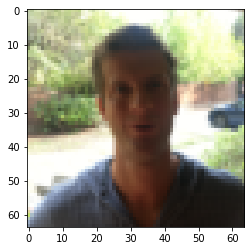

In [3]:
index = 120
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

<a name='3'></a>
## 3- happyModel

Implementing `happyModel` function below to build the following model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`.

<a name='3-1'></a>

### 3.1 - Building the Model

In [4]:
def happyModel(input_shape=[64,64,3]):
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential(layers=[
        
        # Input with shape of 64 x 64 x 3
        tf.keras.layers.Input(shape=input_shape),

        ## ZeroPadding2D with padding 3
        tf.keras.layers.ZeroPadding2D(padding=3),

        ## Conv2D with 32 7x7 filters and stride of 1
        tf.keras.layers.Conv2D(filters=32, kernel_size=(7,7), strides=(1,1)),

        ## BatchNormalization for axis 3
        tf.keras.layers.BatchNormalization(axis=3),

        ## ReLU
        tf.keras.layers.ReLU(),

        ## Max Pooling 2D with default parameters
        tf.keras.layers.MaxPool2D(),
        
        ## Flatten layer
        tf.keras.layers.Flatten(),
        
        ## Dense layer with 1 unit for output & 'sigmoid' activation
        tf.keras.layers.Dense(units=1, activation='sigmoid')
            
    ])
    
    return model

In [5]:
happy_model = happyModel()
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

<a name='3-2'></a>

### 3.2 - Compiling the Model

In [6]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

<a name='4'></a>
### 4 - Train the happyModel

In [7]:
history = happy_model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/50
10/10 [==============================] - 9s 737ms/step - loss: 3.2765 - accuracy: 0.4933 - val_loss: 0.7262 - val_accuracy: 0.6133
Epoch 2/50
10/10 [==============================] - 6s 623ms/step - loss: 1.1453 - accuracy: 0.6367 - val_loss: 0.6719 - val_accuracy: 0.5467
Epoch 3/50
10/10 [==============================] - 6s 632ms/step - loss: 0.4387 - accuracy: 0.8067 - val_loss: 1.0176 - val_accuracy: 0.5133
Epoch 4/50
10/10 [==============================] - 7s 649ms/step - loss: 0.2953 - accuracy: 0.8700 - val_loss: 0.7681 - val_accuracy: 0.5333
Epoch 5/50
10/10 [==============================] - 5s 489ms/step - loss: 0.1913 - accuracy: 0.9283 - val_loss: 0.7821 - val_accuracy: 0.5400
Epoch 6/50
10/10 [==============================] - 6s 606ms/step - loss: 0.1431 - accuracy: 0.9517 - val_loss: 0.6857 - val_accuracy: 0.5867
Epoch 7/50
10/10 [==============================] - 4s 387ms/step - loss: 0.1240 - accuracy: 0.9667 - val_loss: 0.6185 - val_accuracy: 0.6133
Epoch 

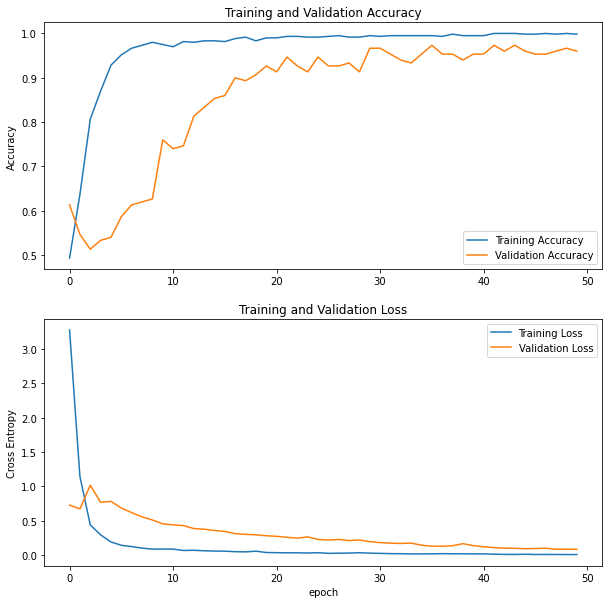

In [8]:
# Plot the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()